
<a id='0'></a>

# Extensive Analysis - EDA + Preprocessing + FE + Modelling 


## 1. Pernyataan Masalah <a class="anchor" id="1"></a>

kami akan mencoba menjawab pertanyaan apakah besok akan hujan atau tidak di Australia. Kami menerapkan Regresi Logistik dengan Python dan Scikit-Learn.

Untuk menjawab pertanyaan tersebut, kami membuat pengklasifikasi untuk memprediksi apakah besok akan hujan di Australia atau tidak. Kami melatih model klasifikasi biner menggunakan Regresi Logistik. Saya telah menggunakan dataset Rain in Australia untuk proyek ini.

Jadi, mari kita mulai.


## 2. Importing Library <a class="anchor" id="2"></a>


Langkah pertama dalam membangun model adalah mengimpor library yang diperlukan.

In [ ]:
import numpy as np
import pandas as pd

# impor Library untuk plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# File input data tersedia di "../input/" directory.
# Misalnya, menjalankan ini (dengan mengklik jalankan atau menekan Shift+Enter) akan menampilkan semua file di bawah direktori input

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Setiap hasil yang ditulis ke direktori saat ini disimpan sebagai keluaran.


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


## 3. Importing dataset <a class="anchor" id="3"></a>


Tahapan selanjutnya adalah import dataset

In [ ]:
data = '/content/weatherAUS.csv'

df = pd.read_csv(data)

## 4. Menganalisis Exploratory data <a class="anchor" id="4"></a>


- Kita telah mengimpor data

- Sekarang, waktunya untuk mengeksplorasi data untuk mendapatkan wawasan tentangnya.

### Melihat dimensi dari dataset <a class="anchor" id="4.1"></a>

In [ ]:
df.shape

(86877, 23)

Kita bisa melihat bahwa ada 142193 instances dan 24 variabel dalam kumpulan data.

### Pratinjau dataset <a class="anchor" id="4.2"></a>

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Melihat Nama Kolom <a class="anchor" id="4.3"></a>

In [ ]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Melihat ringkasan dataset <a class="anchor" id="4.5"></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86877 entries, 0 to 86876
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           86877 non-null  object 
 1   Location       86877 non-null  object 
 2   MinTemp        85681 non-null  float64
 3   MaxTemp        85865 non-null  float64
 4   Rainfall       84535 non-null  float64
 5   Evaporation    47217 non-null  float64
 6   Sunshine       40297 non-null  float64
 7   WindGustDir    80596 non-null  object 
 8   WindGustSpeed  80604 non-null  float64
 9   WindDir9am     79092 non-null  object 
 10  WindDir3pm     83907 non-null  object 
 11  WindSpeed9am   85429 non-null  float64
 12  WindSpeed3pm   84810 non-null  float64
 13  Humidity9am    84811 non-null  float64
 14  Humidity3pm    84390 non-null  float64
 15  Pressure9am    76221 non-null  float64
 16  Pressure3pm    76268 non-null  float64
 17  Cloud9am       53399 non-null  float64
 18  Cloud3

#### Comment

- Kita dapat melihat bahwa dataset berisi campuran variabel kategori dan numerik.

- Variabel kategori memiliki tipe data `object`.

- Variabel numerik memiliki tipe data `float64`.

- Juga, ada beberapa nilai yang hilang dalam kumpulan data. Kami akan menjelajahinya nanti.

### Melihat statistical properties dari dataset <a class="anchor" id="4.6"></a>

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,85681.000000,85865.000000,84535.000000,47217.000000,40297.000000,80604.000000,85429.000000,84810.000000,84811.000000,84390.000000,76221.000000,76268.000000,53399.000000,52375.000000,85314.000000,84837.000000
mean,11.269229,22.165109,2.368370,5.027261,7.218130,39.745385,13.522668,18.220764,71.802915,52.999182,1018.225796,1015.910949,4.676061,4.736687,15.764002,20.700123
std,6.117585,6.887668,8.209405,3.942295,3.852638,14.346916,9.259178,9.245096,17.860405,20.547610,7.139654,7.015834,2.886716,2.685952,6.045652,6.695385
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.900000,17.300000,0.000000,2.400000,4.200000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.500000,1011.200000,1.000000,2.000000,11.400000,16.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,73.000000,53.000000,1018.300000,1016.000000,6.000000,5.000000,15.800000,20.300000
75%,16.000000,26.600000,0.800000,6.800000,10.300000,48.000000,19.000000,24.000000,86.000000,67.000000,1023.000000,1020.600000,7.000000,7.000000,20.200000,25.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


#### Poin penting untuk diperhatikan


- Perintah `df.describe()` di atas membantu kita untuk melihat properti statistik dari variabel numerik. Itu tidak termasuk variabel karakter.

- Jika kita ingin melihat properti statistik dari variabel karakter, kita harus menjalankan perintah berikut -

       df.describe(include=['object'])

- Jika kita ingin melihat properti statistik dari semua variabel, kita harus menjalankan perintah berikut --

      df.describe(include='all')

## 5. Analysis Univariate <a class="anchor" id="5"></a>

### Jelajahi variabel target `RainTomorrow` <a class="anchor" id="5.1"></a>

#### Periksa nilai yang hilang

In [ ]:
df['RainTomorrow'].isnull().sum()

2340

Kita dapat melihat bahwa tidak ada nilai yang hilang di variable `RainTomorrow`.

#### Melihat jumlah nilai unik

In [ ]:
df['RainTomorrow'].nunique()

2

Kita dapat melihat jumlah nilai yang unik pada variable RainTomorrow adalah 2

#### Melihat nilai yang unik

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

2 Nilai yang unik tersebut adalah `No` dan `Yes`.

#### Lihat distribusi frekuensi nilai

In [ ]:
df['RainTomorrow'].value_counts()

No     65220
Yes    19317
Name: RainTomorrow, dtype: int64

#### Lihat persentase distribusi frekuensi nilai

In [ ]:
df['RainTomorrow'].value_counts()/len(df)

No     0.750717
Yes    0.222349
Name: RainTomorrow, dtype: float64

#### Comment

Kita dapat melihat bahwa dari jumlah total nilai `RainTomorrow`, `No` muncul 77,58% kali dan `Yes` muncul 22,42% kali.

#### Visualisasikan distribusi frekuensi variabel RainTomorrow

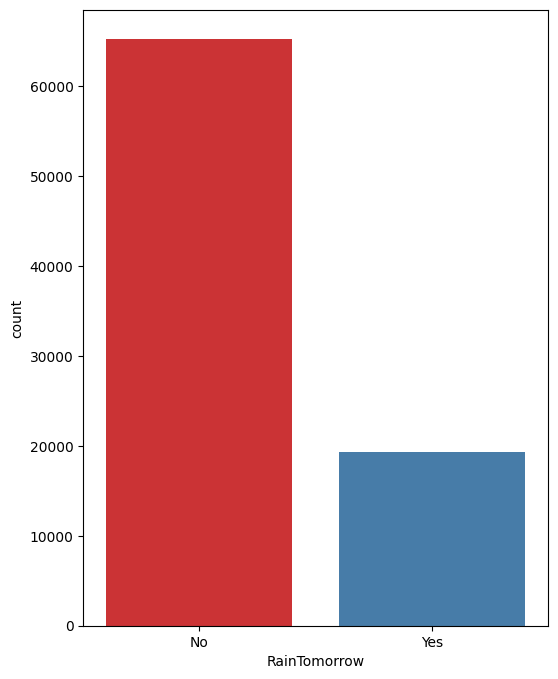

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

#### Interpretasi

Plot univariat di atas menegaskan temuan kami bahwa -

*   Variabel No memiliki 110316 entri, dan
*   Variabel Yes memiliki 31.877 entri.




Kita dapat memplot bar secara horizontal sebagai berikut :

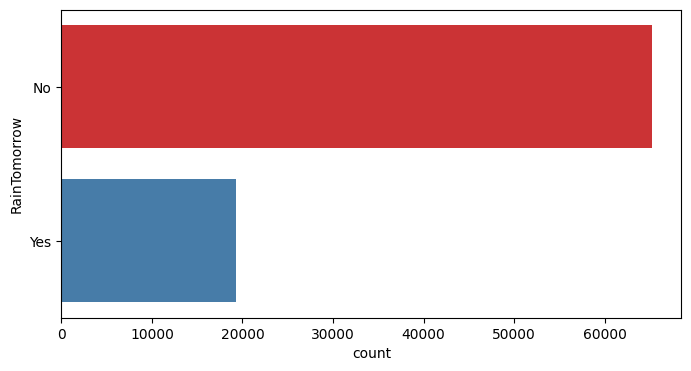

In [ ]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

### Hasil temuan Univariate Analysis <a class="anchor" id="5.2"></a>


-	Jumlah nilai unik dalam variabel `RainTomorrow` adalah 2.
-	Dua nilai unik tersebut adalah `No` dan `Yes`.
-	Dari jumlah total nilai `RainTomorrow`, `No` muncul 77,58% kali dan `Yes` muncul 22,42% kali.

-	Plot univariat mengkonfirmasi temuan kami itu –

     -  Variabel `No` memiliki 110316 entri, dan        
     
     - Variabel `Ya` memiliki 31877 entri.


## 6. Menganalisis Bivariate<a class="anchor" id="6"></a>

### Jenis variables <a class="anchor" id="6.1"></a>


Jenis variabel
Pada bagian ini, saya memisahkan dataset menjadi variabel kategori dan numerik. Ada campuran variabel kategori dan numerik dalam kumpulan data. Variabel kategori memiliki tipe data objek. Variabel numerik memiliki tipe data float64.

Pertama-tama, saya akan menemukan variabel kategori.

### Jelajahi Variabel Kategori <a class="anchor" id="6.2"></a>

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Ringkasan dari categorical variables <a class="anchor" id="6.3"></a>


- terdapat variabel date, dilambangkan `Date`.


- Ada 6 variable kategori yang diberikan : `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- Ada 2 variabel kategori biner - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` adalah variabel target

### Jelajahi masalah dalam variabel kategori <a class="anchor" id="6.4"></a>


Pertama, saya akan mengeksplorasi variabel kategorikal.




#### Nilai yang hilang dalam variabel kategori

In [ ]:
# Periksa nilai yang hilang di categorical variables

df[categorical].isnull().sum()

Date               0
Location           0
WindGustDir     6281
WindDir9am      7785
WindDir3pm      2970
RainToday       2342
RainTomorrow    2340
dtype: int64

In [ ]:
# cetak variabel kategori yang berisi nilai yang hilang

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     6281
WindDir9am      7785
WindDir3pm      2970
RainToday       2342
RainTomorrow    2340
dtype: int64


Kita dapat melihat bahwa hanya ada 4 variabel kategori dalam dataset yang mengandung missing value. Ini adalah `WindGustDir`, `WindDir9am`, `WindDir3pm` and `RainToday`.

#### Jumlah frequensi dari categorical variables

Sekarang, saya akan memeriksa jumlah frekuensi variabel kategori.

In [ ]:
# Melihat frequensi dari categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2013-11-12    29
2014-05-01    29
2014-04-24    29
2014-04-25    29
2014-04-26    29
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Melbourne           3193
Albury              3040
Bendigo             3040
Ballarat            3040
MountGinini         3040
Wollongong          3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
CoffsHarbour        3009
Dartmoor            3009
Watsonia            3009
Portland            3009
Mildura             3009
Cobar               3009
MelbourneAirport    3009
Sale                3009
Moree               3009
Richmond            3009
BadgerysCreek       3009
Williamtown         3009
WaggaWagga          3009
SydneyAirport       3009
NorfolkIsland       3009
NorahHead           3004
Brisbane            2870
Nhil                1578
Name: Location, dtype: int64
W      7070
S      6

In [ ]:
# Melihat frequensi distribusi dari categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

2013-11-12    0.000334
2014-05-01    0.000334
2014-04-24    0.000334
2014-04-25    0.000334
2014-04-26    0.000334
                ...   
2007-11-29    0.000012
2007-11-28    0.000012
2007-11-27    0.000012
2007-11-26    0.000012
2008-01-31    0.000012
Name: Date, Length: 3436, dtype: float64
Canberra            0.039550
Sydney              0.038491
Melbourne           0.036753
Albury              0.034992
Bendigo             0.034992
Ballarat            0.034992
MountGinini         0.034992
Wollongong          0.034992
Penrith             0.034980
Tuggeranong         0.034980
Newcastle           0.034980
CoffsHarbour        0.034635
Dartmoor            0.034635
Watsonia            0.034635
Portland            0.034635
Mildura             0.034635
Cobar               0.034635
MelbourneAirport    0.034635
Sale                0.034635
Moree               0.034635
Richmond            0.034635
BadgerysCreek       0.034635
Williamtown         0.034635
WaggaWagga          0.034635
SydneyAirp

#### Jumlah label: kardinalitas


Jumlah label dalam variabel kategori dikenal sebagai kardinalitas. Sejumlah besar label dalam variabel dikenal sebagai kardinalitas tinggi. Kardinalitas tinggi dapat menimbulkan beberapa masalah serius dalam model pembelajaran mesin. Jadi, saya akan memeriksa kardinalitas tinggi.

In [ ]:
# Periksa kardinalitas dalam variabel kategori

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  29  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


Kita dapat melihat bahwa ada variabel `Date` yang perlu diproses terlebih dahulu. Saya akan melakukan preprocessing di bagian berikut.


Semua variabel lainnya mengandung jumlah variabel yang relatif lebih kecil.

#### Feature Engineering dari variabel date

In [ ]:
df['Date'].dtypes

dtype('O')

Kita dapat melihat bahwa tipe data dari variabel Date adalah objek. Saya akan mengurai tanggal yang saat ini dikodekan sebagai objek ke dalam format datetime.

In [ ]:
# parsing date, saat ini dikodekan sebagai string, ke dalam format datetime

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [ ]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [ ]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [ ]:
# Nelihat kembali ringkasan dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86877 entries, 0 to 86876
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           86877 non-null  datetime64[ns]
 1   Location       86877 non-null  object        
 2   MinTemp        85681 non-null  float64       
 3   MaxTemp        85865 non-null  float64       
 4   Rainfall       84535 non-null  float64       
 5   Evaporation    47217 non-null  float64       
 6   Sunshine       40297 non-null  float64       
 7   WindGustDir    80596 non-null  object        
 8   WindGustSpeed  80604 non-null  float64       
 9   WindDir9am     79092 non-null  object        
 10  WindDir3pm     83907 non-null  object        
 11  WindSpeed9am   85429 non-null  float64       
 12  WindSpeed3pm   84810 non-null  float64       
 13  Humidity9am    84811 non-null  float64       
 14  Humidity3pm    84390 non-null  float64       
 15  Pressure9am    7622

Kita dapat melihat bahwa ada tiga kolom tambahan yang dibuat dari variabel Date. Sekarang, saya akan menghapus variabel Date asli dari kumpulan data.

In [ ]:
# jatuhkan variabel Tanggal asli

df.drop('Date', axis=1, inplace = True)

In [ ]:
# pratinjau dataset lagi

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Sekarang, kita dapat melihat bahwa variabel Date telah dihapus dari kumpulan data.


#### Jelajahi Variabel Kategoris satu per satu


Sekarang, saya akan mengeksplorasi variabel kategori satu per satu.

In [ ]:
# Temukan categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Kita dapat melihat bahwa ada 6 variabel kategori dalam dataset. Variabel `Date` telah dihapus. Pertama, saya akan memeriksa nilai yang hilang dalam variabel kategori.

In [ ]:
# Periksa nilai yang hilang di categorical variables 

df[categorical].isnull().sum()

Location           0
WindGustDir     6281
WindDir9am      7785
WindDir3pm      2970
RainToday       2342
RainTomorrow    2340
dtype: int64

Kita bisa melihat bahwa `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` variabel berisi nilai yang hilang. Saya akan mengeksplorasi variabel-variabel ini satu per satu.

### Mengeksplor Variable `Location`

In [ ]:
# print nomer label di variabel Location 

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 29 labels


In [ ]:
# periksa label di variabel location 

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane'],
      dtype=object)

In [ ]:
# Periksa distribusi frekuensi nilai dalam variabel Location

df.Location.value_counts()

Canberra            3436
Sydney              3344
Melbourne           3193
Albury              3040
Bendigo             3040
Ballarat            3040
MountGinini         3040
Wollongong          3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
CoffsHarbour        3009
Dartmoor            3009
Watsonia            3009
Portland            3009
Mildura             3009
Cobar               3009
MelbourneAirport    3009
Sale                3009
Moree               3009
Richmond            3009
BadgerysCreek       3009
Williamtown         3009
WaggaWagga          3009
SydneyAirport       3009
NorfolkIsland       3009
NorahHead           3004
Brisbane            2870
Nhil                1578
Name: Location, dtype: int64

In [ ]:
# ayo lakukan One Hot Encoding untuk variabel Lokasi
# dapatkan variabel dummy k-1 setelah One Hot Encoding
# preview dataset dengan metode head()

pd.get_dummies(df.Location, drop_first=True).head()

,BadgerysCreek,Ballarat,Bendigo,Brisbane,Canberra,Cobar,CoffsHarbour,Dartmoor,Melbourne,MelbourneAirport,...,Portland,Richmond,Sale,Sydney,SydneyAirport,Tuggeranong,WaggaWagga,Watsonia,Williamtown,Wollongong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore variabel `WindGustDir`

In [ ]:
# print nomor label dari variabel WindGustDir

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [ ]:
# Periksa label dari variabel WindGustDir

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
# Periksa nilai distribusi frequensi dari variabel WindGustDir

df.WindGustDir.value_counts()

W      7070
S      6225
N      6222
WSW    5707
SSW    5454
WNW    5431
SW     5320
SSE    5091
E      4874
ENE    4627
NE     4524
NW     4449
SE     4391
NNE    4378
ESE    3596
NNW    3237
Name: WindGustDir, dtype: int64

In [ ]:
# ayo lakukan One Hot Encoding dari variabel WindGustDir
# dapatkan variabel dummy k-1 setelah One Hot Encoding
# tambahkan juga variabel dummy tambahan untuk menunjukkan ada data yang hilang
# preview dataset dengan metode head()

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# jumlahkan jumlah 1 per variabel boolean di atas baris kumpulan data
# ini akan memberi tahu kita berapa banyak pengamatan yang kita miliki untuk setiap kategori

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    4627
ESE    3596
N      6222
NE     4524
NNE    4378
NNW    3237
NW     4449
S      6225
SE     4391
SSE    5091
SSW    5454
SW     5320
W      7070
WNW    5431
WSW    5707
NaN    6281
dtype: int64

Kita dapat melihat bahwa ada 9330 nilai yang hilang dalam variabel WindGustDir.

### Explore Variabel `WindDir9am`

In [ ]:
# print Nomor label di variabel WindDir9am

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [ ]:
# Periksa label dari Variabel WindDir9am

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
# Periksa nilai distribusi frequency dari variabel WinDir9am

df['WindDir9am'].value_counts()

N      7609
W      6243
SW     6203
NW     5418
WNW    5200
SSW    5158
WSW    5052
S      4893
NNE    4865
SE     4411
SSE    4385
E      4281
NE     4083
NNW    4049
ENE    3947
ESE    3295
Name: WindDir9am, dtype: int64

In [ ]:
# ayo lakukan One Hot Encoding dari variabel WindDir9am
# dapatkan variabel dummy k-1 setelah One Hot Encoding
# tambahkan juga variabel dummy tambahan untuk menunjukkan ada data yang hilang
# preview dataset dengan metode head()d

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# jumlahkan jumlah 1 per variabel boolean di atas baris kumpulan data
# ini akan memberi tahu kita berapa banyak pengamatan yang kita miliki untuk setiap kategori

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    3947
ESE    3295
N      7609
NE     4083
NNE    4865
NNW    4049
NW     5418
S      4893
SE     4411
SSE    4385
SSW    5158
SW     6203
W      6243
WNW    5200
WSW    5052
NaN    7785
dtype: int64

Kita dapat melihat bahwa ada 10013 nilai yang hilang dalam variabel `WindDir9am`.

### Explore Variabel `WindDir3pm`

Lakukan hal yang sama dengan variabel diatas

In [ ]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [ ]:
# periksa label dalam variabel WindDir3pm

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [ ]:
# periksa distribusi frekuensi nilai dalam variabel WindDir3pm

df['WindDir3pm'].value_counts()

S      6648
W      6571
N      5840
SE     5808
NE     5738
WNW    5625
WSW    5314
SSE    5206
E      5048
SSW    5024
SW     4999
NW     4946
ESE    4341
NNE    4334
ENE    4321
NNW    4144
Name: WindDir3pm, dtype: int64

In [ ]:
# ayo lakukan One Hot Encoding dari variabel WindDir3pm
# dapatkan variabel dummy k-1 setelah One Hot Encoding
# tambahkan juga variabel dummy tambahan untuk menunjukkan ada data yang hilang
# preview dataset dengan metode head()

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# jumlahkan jumlah 1 per variabel boolean di atas baris kumpulan data
# ini akan memberi tahu kita berapa banyak pengamatan yang kita miliki untuk setiap kategori

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    4321
ESE    4341
N      5840
NE     5738
NNE    4334
NNW    4144
NW     4946
S      6648
SE     5808
SSE    5206
SSW    5024
SW     4999
W      6571
WNW    5625
WSW    5314
NaN    2970
dtype: int64

Ada 3778 nilai yang hilang dalam variabel `WindDir3pm`.

### Explore Variabel `RainToday`

In [ ]:
# cetak jumlah label dalam variabel RainToday

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [ ]:
# periksa label dalam variabel WindGustDir

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# periksa distribusi frekuensi nilai dalam variabel WindGustDir

df.RainToday.value_counts()

No     65220
Yes    19315
Name: RainToday, dtype: int64

In [ ]:
# ayo lakukan One Hot Encoding dari variabel RainToday
# dapatkan variabel dummy k-1 setelah One Hot Encoding
# tambahkan juga variabel dummy tambahan untuk menunjukkan ada data yang hilang
# preview dataset dengan metode head()

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
# jumlahkan jumlah 1 per variabel boolean di atas baris kumpulan data
# ini akan memberi tahu kita berapa banyak pengamatan yang kita miliki untuk setiap kategori

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    19315
NaN     2342
dtype: int64

Ada 1406 nilai yang hilang dalam variabel `RainToday`.

### Explore Variabel Numerical  <a class="anchor" id="6.5"></a>

In [ ]:
# Mencari Variabel Numerical 

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [ ]:
# Melihat Variabel Numerical

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Ringkasan dari variabel numerical<a class="anchor" id="6.6"></a>


- ada 16 variabel numerical 


-yakni : `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- Semua variabel numerik bertipe kontinu.

### Jelajahi masalah dalam variabel numerik <a class="anchor" id="6.7"></a>


Sekarang, saya akan mengeksplorasi variabel numerik.


### Nilai yang hilang dalam variabel numerik

In [ ]:
# periksa nilai yang hilang dalam variabel numerik

df[numerical].isnull().sum()

MinTemp           1196
MaxTemp           1012
Rainfall          2342
Evaporation      39660
Sunshine         46580
WindGustSpeed     6273
WindSpeed9am      1448
WindSpeed3pm      2067
Humidity9am       2066
Humidity3pm       2487
Pressure9am      10656
Pressure3pm      10609
Cloud9am         33478
Cloud3pm         34502
Temp9am           1563
Temp3pm           2040
Year                 0
Month                0
Day                  0
dtype: int64

Kita dapat melihat bahwa semua 16 variabel numerik mengandung nilai yang hilang.

### Outlier dalam variabel numerik

In [ ]:
# melihat ringkasan statistik dalam variabel numerik

print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  85681.0  85865.0   84535.0      47217.0   40297.0        80604.0   
mean      11.0     22.0       2.0          5.0       7.0           40.0   
std        6.0      7.0       8.0          4.0       4.0           14.0   
min       -8.0     -5.0       0.0          0.0       0.0            7.0   
25%        7.0     17.0       0.0          2.0       4.0           30.0   
50%       11.0     22.0       0.0          4.0       8.0           37.0   
75%       16.0     27.0       1.0          7.0      10.0           48.0   
max       32.0     47.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       85429.0       84810.0      84811.0      84390.0      76221.0   
mean           14.0          18.0         72.0         53.0       1018.0   
std             9.0           9.0         18.0         21.0          7.0   
min             0.0 

Jika diamati lebih dekat, kita dapat melihat bahwa kolom `Rainfall`, `Evaporation`, `WindSpeed9am`, dan `WindSpeed3pm` mungkin berisi outlier.

Saya akan menggambar boxplot untuk memvisualisasikan outlier dalam variabel di atas.

Text(0, 0.5, 'WindSpeed3pm')

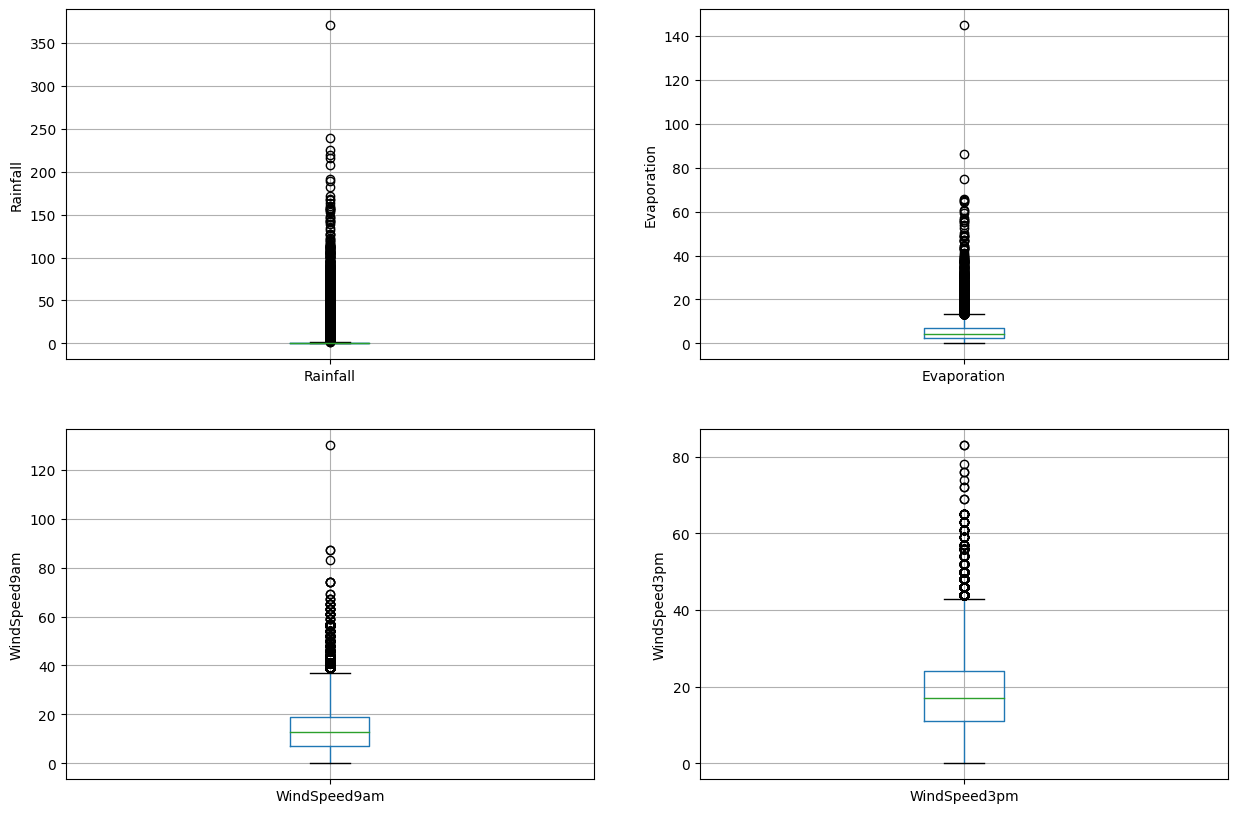

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Boxplot di atas mengkonfirmasi bahwa ada banyak outlier dalam variabel-variabel ini.

### Periksa distribusi variabel


- Sekarang, saya akan memplot histogram untuk memeriksa distribusi untuk mengetahui apakah normal atau miring.

- Jika variabel mengikuti distribusi normal, maka saya akan melakukan `Extreme Value Analysis` sebaliknya jika miring, saya akan menemukan IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

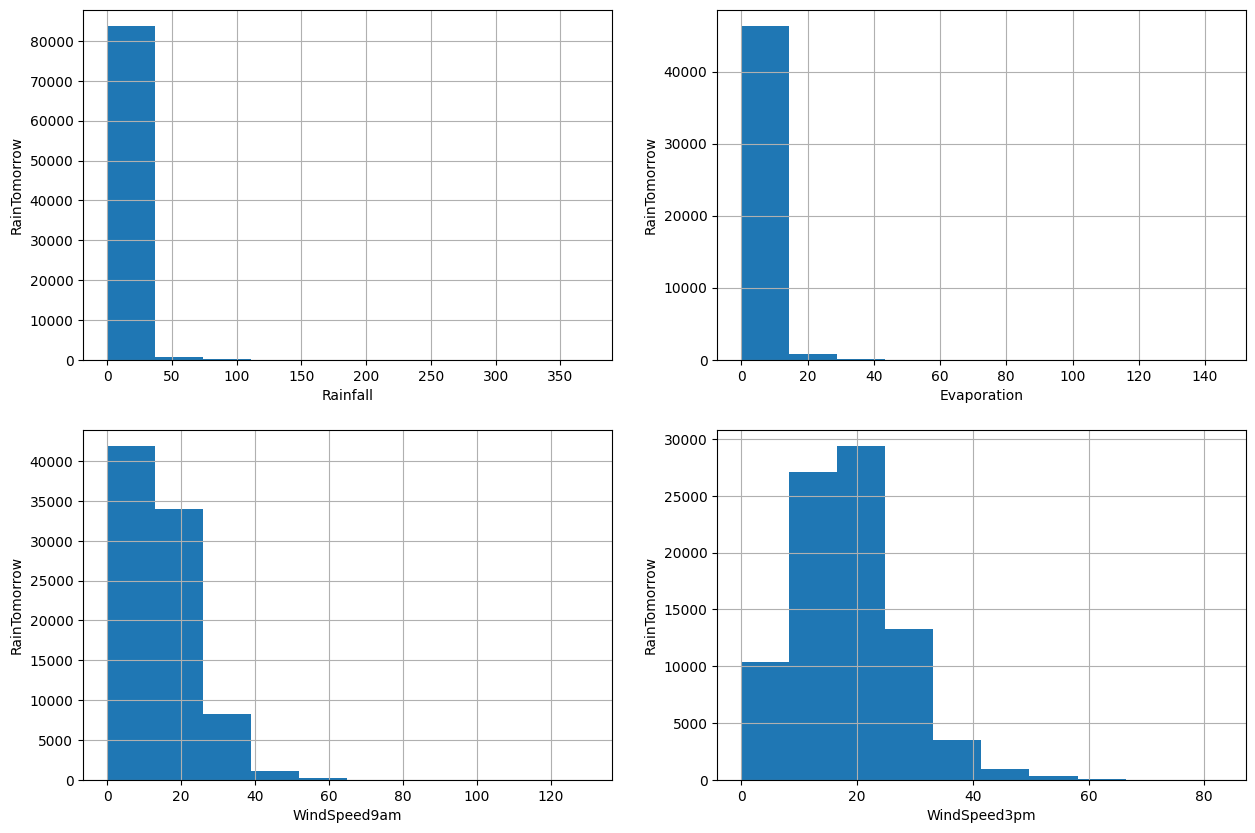

In [ ]:
# plot histogram untuk memeriksa distribusi

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Kita dapat melihat bahwa keempat variabel tersebut miring. Jadi, saya akan menggunakan rentang interkuantil untuk menemukan outlier

In [ ]:
# temukan outlier untuk variabel Curah Hujan

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


Untuk `Rainfall`, nilai minimum dan maksimumnya adalah 0,0 dan 371,0. Jadi, outlier adalah nilai > 3.2.

In [ ]:
# temukan outlier untuk variabel Evaporasi

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -10.8 or > 20.0


Untuk `Evaporasi`, nilai minimum dan maksimum adalah 0,0 dan 145,0. Jadi, outliernya adalah nilai > 21,8.

In [ ]:
# temukan outlier untuk variabel WindSpeed9am

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


Untuk `WindSpeed9am`, nilai minimum dan maksimum adalah 0,0 dan 130,0. Jadi, outliernya adalah nilai > 55,0.

In [ ]:
# temukan outlier untuk variabel WindSpeed3pm

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -28.0 or > 63.0


Untuk `WindSpeed3pm`, nilai minimum dan maksimum adalah 0,0 dan 87,0. Jadi, outliernya adalah nilai > 57,0.

## 7. Menganalisis Multivariate <a class="anchor" id="7"></a>


- Langkah penting dalam EDA adalah menemukan pola dan hubungan antar variabel dalam kumpulan data.

- Saya akan menggunakan heat map dan pair plot untuk menemukan pola dan hubungan dalam dataset.

- Pertama-tama, saya akan menggambar peta panas.

In [ ]:
correlation = df.corr()

### Heat Map <a class="anchor" id="7.1"></a>

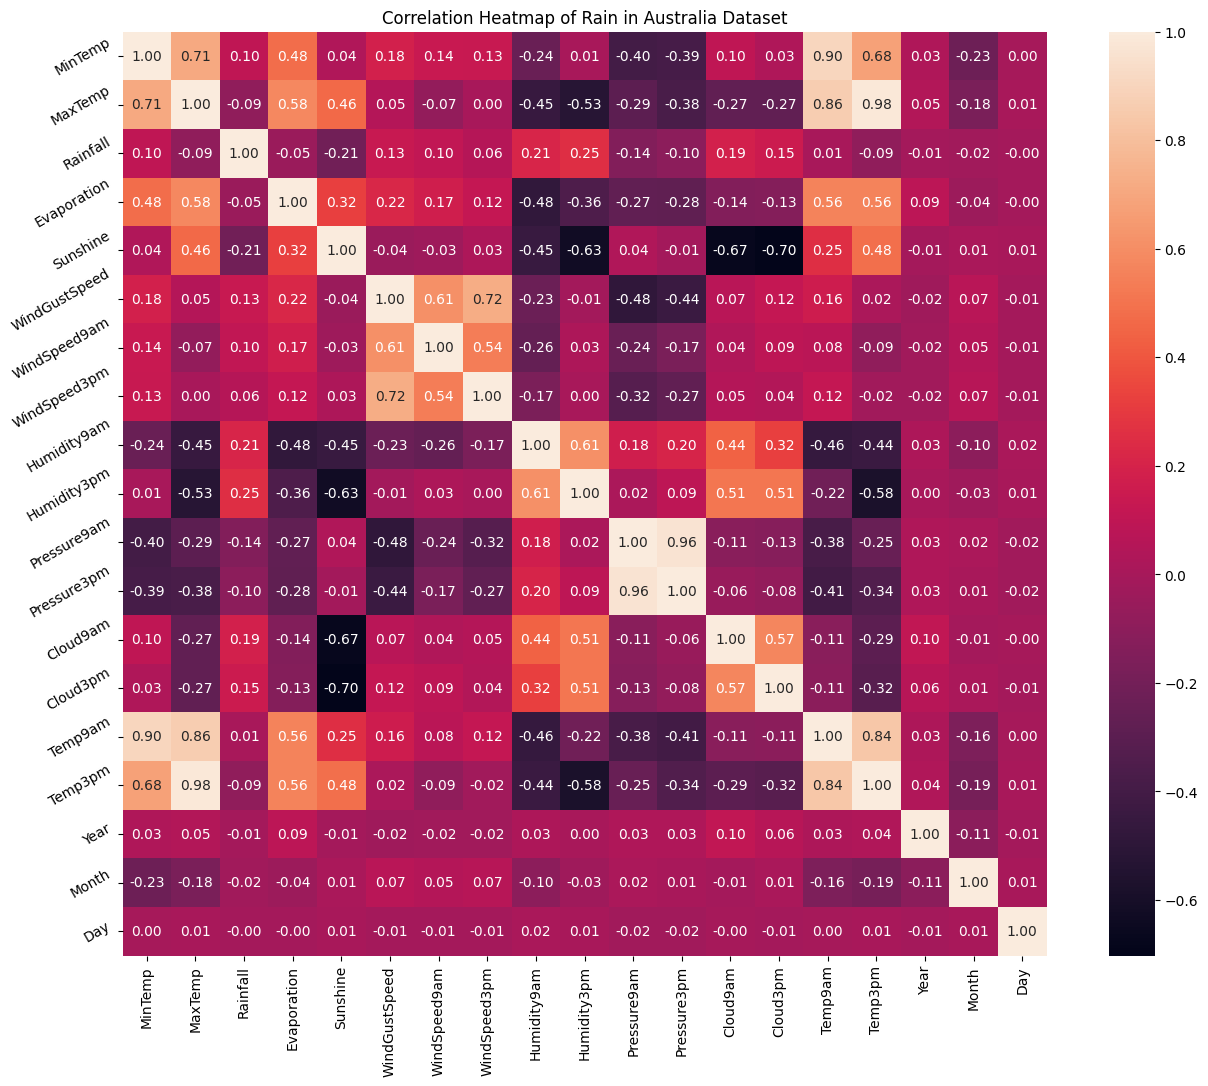

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

#### Penafsiran



Dari korelasi heat map di atas, kita dapat menyimpulkan bahwa :-

- Variabel `MinTemp` dan `MaxTemp` berkorelasi sangat positif (koefisien korelasi = 0,74).

- Variabel `MinTemp` dan `Temp3pm` juga berkorelasi sangat positif (koefisien korelasi = 0,71).

- Variabel `MinTemp` dan `Temp9am` berkorelasi positif kuat (koefisien korelasi = 0,90).

- Variabel `MaxTemp` dan `Temp9am` berkorelasi positif kuat (koefisien korelasi = 0,89).

- Variabel `MaxTemp` dan `Temp3pm` juga berkorelasi positif kuat (koefisien korelasi = 0,98).

- Variabel `WindGustSpeed` dan `WindSpeed3pm` berkorelasi sangat positif (koefisien korelasi = 0,69).

- Variabel `Pressure9am` dan `Pressure3pm` berkorelasi positif kuat (koefisien korelasi = 0,96).

- Variabel `Temp9am` dan `Temp3pm` berkorelasi positif kuat (koefisien korelasi = 0,86).

### Pair Plot <a class="anchor" id="7.2"></a>


Pertama-tama, saya akan mendefinisikan ekstrak variabel yang berkorelasi sangat positif.

In [ ]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

Sekarang, saya akan menggambar pairplot untuk menggambarkan hubungan antara variabel-variabel tersebut.

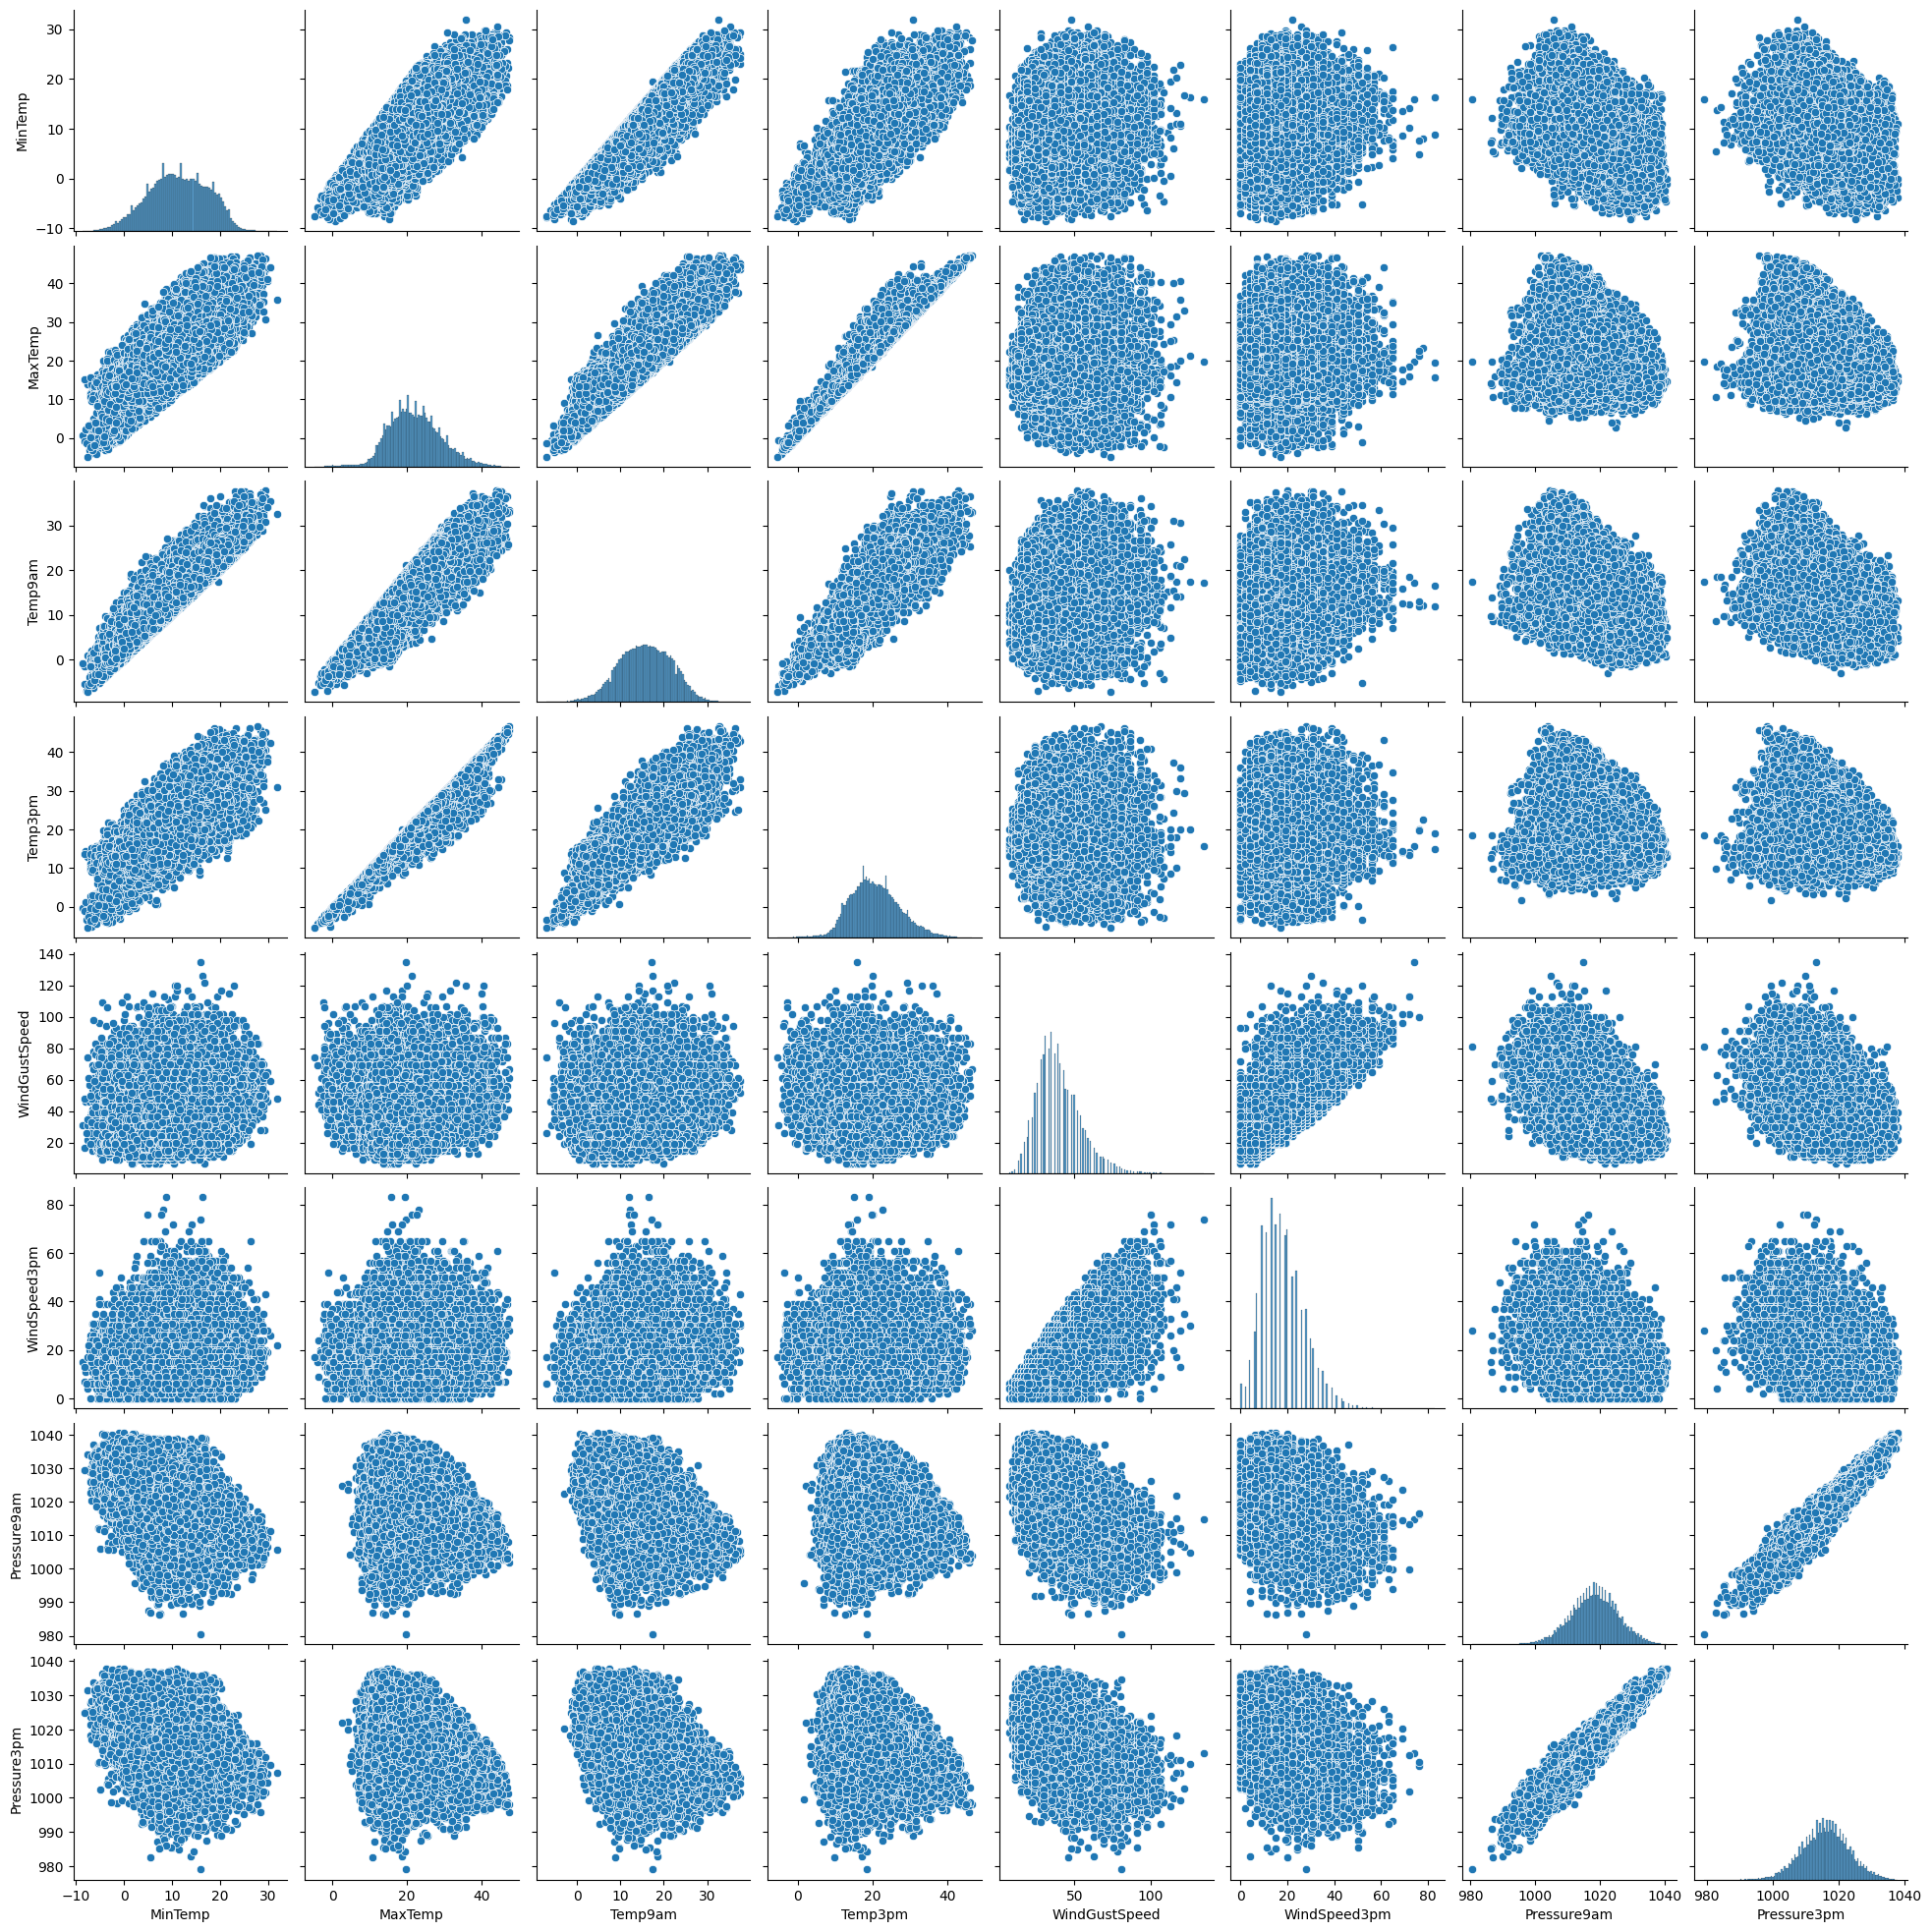

In [ ]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

#### Penafsiran


- Saya telah mendefinisikan variabel `num_var` yang terdiri dari `MinTemp`, `MaxTemp`, `Temp9am`, `Temp3pm`, `WindGustSpeed`, `WindSpeed3pm`, `Pressure9am` dan variabel `Pressure3pm`.

- Plot pasangan di atas menunjukkan hubungan antara variabel-variabel ini.

## 8. Deklarasikan vektor fitur dan variabel target<a class="anchor" id="8"></a>

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## 9. Pisahkan data menjadi set training dan testing terpisah <a class="anchor" id="9"></a>

In [ ]:
# pisahkan X dan y menjadi set training dan testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# periksa bentuk X_train dan X_test

X_train.shape, X_test.shape

((69501, 24), (17376, 24))

## 10. Feature Engineering <a class="anchor" id="10"></a>


**Feature Engineering** adalah proses mengubah data mentah menjadi fitur berguna yang membantu kita memahami model dengan lebih baik dan meningkatkan daya prediktifnya. Saya akan melakukan rekayasa fitur pada berbagai jenis variabel.

Pertama, saya akan menampilkan kembali variabel kategori dan numerik secara terpisah.


In [ ]:
# Periksa type data X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [ ]:
# menampilkan categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# menampilkan numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Rekayasa nilai yang hilang dalam variabel numerik <a class="anchor" id="10.1"></a>



In [ ]:
# Periksa nilai yang hilang di numerical variables dan X_train

X_train[numerical].isnull().sum()

MinTemp            960
MaxTemp            811
Rainfall          1878
Evaporation      31687
Sunshine         37249
WindGustSpeed     5019
WindSpeed9am      1137
WindSpeed3pm      1672
Humidity9am       1633
Humidity3pm       2009
Pressure9am       8536
Pressure3pm       8496
Cloud9am         26837
Cloud3pm         27697
Temp9am           1231
Temp3pm           1654
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
# Periksa nilai yang hilang di Vriabel numerical dan X_test

X_test[numerical].isnull().sum()

MinTemp           236
MaxTemp           201
Rainfall          464
Evaporation      7973
Sunshine         9331
WindGustSpeed    1254
WindSpeed9am      311
WindSpeed3pm      395
Humidity9am       433
Humidity3pm       478
Pressure9am      2120
Pressure3pm      2113
Cloud9am         6641
Cloud3pm         6805
Temp9am           332
Temp3pm           386
Year                0
Month               0
Day                 0
dtype: int64

In [ ]:
# print persentase nilai yang hilang di numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0138
MaxTemp 0.0117
Rainfall 0.027
Evaporation 0.4559
Sunshine 0.5359
WindGustSpeed 0.0722
WindSpeed9am 0.0164
WindSpeed3pm 0.0241
Humidity9am 0.0235
Humidity3pm 0.0289
Pressure9am 0.1228
Pressure3pm 0.1222
Cloud9am 0.3861
Cloud3pm 0.3985
Temp9am 0.0177
Temp3pm 0.0238


#### Assumption


Saya berasumsi bahwa datanya hilang sepenuhnya secara acak (MCAR). Ada dua metode yang dapat digunakan untuk menghitung nilai yang hilang. Salah satunya adalah imputasi rata-rata atau median dan yang lainnya adalah imputasi sampel acak. Ketika ada outlier dalam dataset, kita harus menggunakan imputasi median. Jadi, saya akan menggunakan imputasi median karena imputasi median kuat terhadap outlier.

Saya akan menghubungkan nilai yang hilang dengan ukuran statistik data yang sesuai, dalam hal ini median. Imputasi harus dilakukan pada set pelatihan, dan kemudian disebarkan ke set tes. Ini berarti bahwa langkah-langkah statistik yang akan digunakan untuk mengisi nilai-nilai yang hilang baik dalam set pelatihan dan pengujian, harus diekstrak dari set kereta saja. Ini untuk menghindari overfitting.

In [ ]:
# menghitung nilai yang hilang di X_train dan X_test dengan median kolom masing-masing di X_train
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)


# Isi nilai yang hilang untuk y_train
y_train_mode = y_train.mode()[0]
y_train.fillna(y_train_mode, inplace=True)

In [ ]:
# Periksa kembali nilai yang hilang di numerical variables dan X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
# Periksa nilai yang hilang di numerical variables di X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Sekarang, kita dapat melihat bahwa tidak ada nilai yang hilang di kolom numerik set training dan testing.

### Rekayasa nilai yang hilang di categorical variables <a class="anchor" id="10.2"></a>

In [ ]:
# print persentase nilai yang hilang dalam variabel kategori dalam set training
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.072301
WindDir9am     0.089207
WindDir3pm     0.034359
RainToday      0.027021
dtype: float64

In [ ]:
# cetak variabel kategori dengan data yang hilang

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.07230111796952562
WindDir9am 0.08920734953453907
WindDir3pm 0.03435921785298053
RainToday 0.027021193939655543


In [ ]:
# memperhitungkan variabel kategori yang hilang dengan nilai paling sering

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [ ]:
# periksa nilai yang hilang di categorical variables di X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
# Periksa nilai yang hilang in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

Sebagai pemeriksaan terakhir, saya akan memeriksa nilai yang hilang di X_train dan X_test.

In [ ]:
# Periksa nilai yang hilang in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
# Periksa nilai yang hilang in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

Kita dapat melihat bahwa tidak ada nilai yang hilang di X_train dan X_test.

### Rekayasa outlier dalam variabel numerik <a class="anchor" id="10.3"></a>


Kita telah melihat bahwa kolom `Rainfall`, `Evaporation`, `WindSpeed9am` dan `WindSpeed3pm` berisi outlier. Saya akan menggunakan pendekatan top-coding untuk membatasi nilai maksimum dan menghapus outlier dari variabel di atas.

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [ ]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [ ]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [ ]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [ ]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [ ]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000
mean,11.256306,22.149077,0.677774,4.624131,7.644891,39.532352,13.514237,18.187379,71.845254,52.988230,1018.279151,1015.951965,5.185523,4.841815,15.746578,20.678746,2012.729802,6.391994,15.722004
std,6.076202,6.847693,1.181797,2.627143,2.657073,13.827590,9.131182,9.103827,17.650405,20.233695,6.677312,6.564234,2.352161,2.087499,5.992743,6.616623,2.535347,3.424067,8.797447
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.000000,17.300000,0.000000,4.000000,8.000000,30.000000,7.000000,11.000000,60.000000,39.000000,1014.400000,1012.000000,4.000000,4.000000,11.500000,16.100000,2010.000000,3.000000,8.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,73.000000,53.000000,1018.400000,1016.000000,6.000000,5.000000,15.800000,20.200000,2013.000000,6.000000,16.000000
75%,15.900000,26.500000,0.600000,4.600000,8.000000,46.000000,19.000000,24.000000,85.000000,66.000000,1022.300000,1020.000000,7.000000,6.000000,20.100000,24.800000,2015.000000,9.000000,23.000000
max,31.900000,47.300000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.600000,46.700000,2017.000000,12.000000,31.000000


Kita sekarang dapat melihat bahwa outlier di kolom `Rainfall`, `Evaporation`, `WindSpeed9am` dan `WindSpeed3pm` dibatasi.

### Encode variabel kategorikal <a class="anchor" id="10.4"></a>

In [ ]:
# print categorical variables

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
61963,Sale,W,W,SW,No
40957,Williamtown,S,SE,SSE,Yes
53176,MountGinini,W,N,NW,No
37872,WaggaWagga,W,N,W,No
274,Albury,WNW,WNW,W,Yes


In [ ]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
61963,Sale,10.6,19.6,0.0,10.1,7.5,W,54.0,W,SW,...,1018.2,4.0,6.0,14.2,18.1,0,1,2011,2,21
40957,Williamtown,18.9,24.3,3.2,21.8,8.0,S,24.0,SE,SSE,...,1015.7,8.0,8.0,20.3,20.4,1,0,2013,1,20
53176,MountGinini,12.1,23.1,0.0,4.2,8.0,W,30.0,N,NW,...,1016.0,6.0,5.0,17.0,22.0,0,1,2012,1,19
37872,WaggaWagga,6.9,28.3,0.0,7.6,11.1,W,35.0,N,W,...,1014.0,1.0,1.0,19.7,27.9,0,1,2012,10,5
274,Albury,5.1,14.2,3.0,4.2,8.0,WNW,24.0,WNW,W,...,1021.7,8.0,1.0,9.7,12.5,1,0,2009,9,1


Kita dapat melihat bahwa dua variabel tambahan `RainToday_0` dan `RainToday_1` dibuat dari variabel `RainToday`.

Sekarang, saya akan membuat set pelatihan `X_train`.

In [ ]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
61963,10.6,19.6,0.0,10.1,7.5,54.0,31.0,31.0,64.0,49.0,...,0,0,0,0,0,0,1,0,0,0
40957,18.9,24.3,3.2,21.8,8.0,24.0,11.0,9.0,93.0,95.0,...,0,0,0,0,1,0,0,0,0,0
53176,12.1,23.1,0.0,4.2,8.0,30.0,6.0,11.0,60.0,54.0,...,0,1,0,0,0,0,0,0,0,0
37872,6.9,28.3,0.0,7.6,11.1,35.0,6.0,24.0,34.0,19.0,...,0,0,0,0,0,0,0,1,0,0
274,5.1,14.2,3.0,4.2,8.0,24.0,7.0,15.0,96.0,58.0,...,0,0,0,0,0,0,0,1,0,0


Demikian pula, saya akan membuat set pengujian `X_test`.

In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
19573,20.5,27.5,0.0,4.2,8.0,35.0,15.0,24.0,78.0,75.0,...,0,0,0,0,0,0,0,0,0,0
27987,12.2,22.8,2.4,2.6,8.0,24.0,0.0,9.0,86.0,44.0,...,0,0,0,0,0,0,0,0,0,1
62734,2.6,16.1,0.2,0.2,8.2,28.0,15.0,19.0,92.0,66.0,...,0,0,0,0,0,0,0,1,0,0
68371,15.6,24.0,0.0,5.4,9.2,59.0,13.0,35.0,60.0,59.0,...,0,0,0,0,0,0,1,0,0,0
54837,-2.2,1.5,3.2,4.2,8.0,96.0,26.0,28.0,98.0,98.0,...,0,0,0,0,0,0,0,0,1,0


Kami sekarang memiliki set training dan testing yang siap untuk pembuatan model. Sebelum itu, kita harus memetakan semua variabel fitur ke skala yang sama. Ini disebut `feature scaling`. Saya akan melakukannya sebagai berikut.

## 11. Feature Scaling <a class="anchor" id="11"></a>

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,...,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000
mean,11.256306,22.149077,0.677774,4.624131,7.644891,39.532352,13.514237,18.187379,71.845254,52.988230,...,0.047208,0.056906,0.111034,0.067625,0.060157,0.057812,0.057352,0.075668,0.064460,0.061208
std,6.076202,6.847693,1.181797,2.627143,2.657073,13.827590,9.131182,9.103827,17.650405,20.233695,...,0.212085,0.231664,0.314177,0.251103,0.237780,0.233390,0.232515,0.264468,0.245571,0.239713
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,17.300000,0.000000,4.000000,8.000000,30.000000,7.000000,11.000000,60.000000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,73.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.900000,26.500000,0.600000,4.600000,8.000000,46.000000,19.000000,24.000000,85.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.900000,47.300000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,...,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000,69501.000000
mean,0.489017,0.517257,0.211805,0.212116,0.527234,0.254159,0.245713,0.319077,0.709745,0.525134,...,0.047208,0.056906,0.111034,0.067625,0.060157,0.057812,0.057352,0.075668,0.064460,0.061208
std,0.150401,0.131434,0.369312,0.120511,0.183246,0.108028,0.166021,0.159716,0.181963,0.204381,...,0.212085,0.231664,0.314177,0.251103,0.237780,0.233390,0.232515,0.264468,0.245571,0.239713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.383663,0.424184,0.000000,0.183486,0.551724,0.179688,0.127273,0.192982,0.587629,0.383838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.490099,0.508637,0.000000,0.192661,0.551724,0.234375,0.236364,0.298246,0.721649,0.525253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.603960,0.600768,0.187500,0.211009,0.551724,0.304688,0.345455,0.421053,0.845361,0.656566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Kami sekarang memiliki dataset `X_train` yang siap dimasukkan ke dalam pengklasifikasi Logistic Regression. Saya akan melakukannya sebagai berikut.

## 12. Model training <a class="anchor" id="12"></a>

In [ ]:
# melatih model regresi logistik pada set pelatihan
from sklearn.linear_model import LogisticRegression


# instantiate modelnya
logreg = LogisticRegression(solver='liblinear', random_state=0)


# sesuai dengan modelnya
logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

## 13. Hasil Prediksi <a class="anchor" id="13"></a>

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### metode predict_proba


Metode **predict_proba** memberikan probabilitas untuk variabel target (0 dan 1) dalam hal ini, dalam bentuk array.

`0 untuk kemungkinan tidak ada hujan` dan `1 untuk kemungkinan hujan.`

In [ ]:
# probabilitas mendapatkan output sebagai 0 - tidak ada hujan

logreg.predict_proba(X_test)[:,0]

array([0.69912795, 0.90847073, 0.95663871, ..., 0.71312512, 0.98447611,
       0.88014353])

In [ ]:
# probabilitas mendapatkan output sebagai 1 - hujan

logreg.predict_proba(X_test)[:,1]

array([0.30087205, 0.09152927, 0.04336129, ..., 0.28687488, 0.01552389,
       0.11985647])

## 14. Periksa skor akurasi <a class="anchor" id="14"></a>

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Buat sebuah objek label encoder
le = LabelEncoder()

# Pasang pembuat enkode ke label di y_test
le.fit(y_test)

# Ubah label string menjadi label numerik di y_test dan y_pred_test
y_test_encoded = le.transform(y_test)
y_pred_test_encoded = le.transform(y_pred_test)

# Menghitung skor akurasi
accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)

# Print accuracy score
print('Model accuracy score: {0:0.4f}'.format(accuracy))

Model accuracy score: 0.8157


Di sini, **y_test** adalah label kelas sebenarnya dan **y_pred_test** adalah label kelas yang diprediksi dalam set pengujian.

### Bandingkan akurasi train-set dan test-set accuracy <a class="anchor" id="14.1"></a>


Sekarang, saya akan membandingkan akurasi train-set dan test-set untuk memeriksa overfitting.

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8441


### Periksa overfitting dan underfitting <a class="anchor" id="14.2"></a>

In [ ]:
# print scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))


Training set score: 0.8441


In [ ]:
# Pasang pembuat enkode ke label di y_test
le.fit(y_test)

# Ubah label string menjadi label numerik di y_test dan y_pred_test
y_test_encoded = le.transform(y_test)
y_pred_test_encoded = le.transform(logreg.predict(X_test))

# Hitung skor akurasi
accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)

# Print the test set score
print('Test set score: {:.4f}'.format(accuracy))

Test set score: 0.8157


Skor akurasi training-set adalah 0,8476 sedangkan akurasi test-set menjadi 0,8501. Kedua nilai ini cukup sebanding. Jadi, tidak ada masalah overfitting.

Dalam Logistic Regression, kami menggunakan nilai default C = 1. Ini memberikan kinerja yang baik dengan akurasi sekitar 85% pada pelatihan dan set pengujian. Tetapi kinerja model pada set pelatihan dan tes sangat sebanding. Kemungkinan kasus underfitting.

Saya akan meningkatkan C dan memasang model yang lebih fleksibel.

In [ ]:
# cocokkan model Regresi Logistik dengan C=100

# instantiate modelnya
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# sesuai dengan modelnya
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

# Pasang pembuat enkode ke label di y_test
le.fit(y_test)

# Ubah label string menjadi label numerik di y_test dan y_pred_test
y_test_encoded = le.transform(y_test)
y_pred_test_encoded = le.transform(logreg100.predict(X_test))

# Menghitung skor akurasi
accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)

# Print the test set score
print('Test set score: {:.4f}'.format(accuracy))

Training set score: 0.8439
Test set score: 0.8157


Kita dapat melihat bahwa, C=100 menghasilkan akurasi rangkaian pengujian yang lebih tinggi dan juga akurasi rangkaian pelatihan yang sedikit meningkat. Jadi, kita dapat menyimpulkan bahwa model yang lebih kompleks akan bekerja lebih baik.

Sekarang, saya akan menyelidiki, apa yang terjadi jika kita menggunakan model yang lebih teregulasi daripada nilai default C=1, dengan menetapkan C=0.01.

In [ ]:
# cocokkan model Regresi Logistik dengan C=001

# instantiate modelnya
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# sesuai dengan modelnya
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

# Pasang pembuat enkode ke label di y_test
le.fit(y_test)

# Ubah label string menjadi label numerik di y_test dan y_pred_test
y_test_encoded = le.transform(y_test)
y_pred_test_encoded = le.transform(logreg001.predict(X_test))

# Menghitung skor akurasi
accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)

# Print the test set score
print('Test set score: {:.4f}'.format(accuracy))

Training set score: 0.8361
Test set score: 0.8078


Jadi, jika kita menggunakan model yang lebih teregulasi dengan menyetel C=0,01, maka akurasi set Training dan testing menurun relatif terhadap parameter default.

### Bandingkan akurasi model dengan akurasi nol <a class="anchor" id="14.3"></a>


Jadi, akurasi model adalah 0,8501. Namun, kami tidak dapat mengatakan bahwa model kami sangat bagus berdasarkan akurasi di atas. Kita harus membandingkannya dengan **akurasi nol**. Akurasi nol adalah akurasi yang dapat dicapai dengan selalu memprediksi kelas yang paling sering muncul.

Jadi, pertama-tama kita harus memeriksa distribusi kelas di set pengujian.

In [ ]:
# periksa distribusi kelas dalam set pengujian

y_test.value_counts()

No     12940
Yes     3962
Name: RainTomorrow, dtype: int64

Kita dapat melihat bahwa kemunculan kelas yang paling sering adalah 22067. Jadi, kita dapat menghitung akurasi nol dengan membagi 22067 dengan jumlah kemunculan.

In [ ]:
# periksa skor akurasi nol

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


#### Penafsiran

Kita dapat melihat bahwa skor akurasi model kita adalah 0,8501 tetapi skor akurasi nol adalah 0,7759. Jadi, kita dapat menyimpulkan bahwa model Logistic Regression kita melakukan pekerjaan yang sangat baik dalam memprediksi label kelas.

#### Penafsiran

Sekarang, berdasarkan analisis di atas dapat disimpulkan bahwa akurasi model klasifikasi kami sangat baik. Model kami melakukan pekerjaan yang sangat baik dalam hal memprediksi label kelas.


Tapi, itu tidak memberikan distribusi nilai yang mendasarinya. Juga, itu tidak memberi tahu apa pun tentang jenis kesalahan yang dibuat oleh pengklasifikasi kami.


Kami memiliki alat lain yang disebut `Confusion Matrix` yang datang untuk menyelamatkan kami.

## 15. Confusion matrix <a class="anchor" id="15"></a>


Confusion matrix adalah alat untuk meringkas kinerja algoritma klasifikasi. Confusion matrix akan memberi kita gambaran yang jelas tentang kinerja model klasifikasi dan jenis kesalahan yang dihasilkan oleh model tersebut. Ini memberi kita ringkasan prediksi yang benar dan salah yang dikelompokkan berdasarkan masing-masing kategori. Ringkasan disajikan dalam bentuk tabel.


Empat jenis hasil dimungkinkan saat mengevaluasi kinerja model klasifikasi. Keempat hasil ini dijelaskan di bawah ini:-


**True Positives (TP)** – True Positives terjadi ketika kita memprediksi suatu observasi termasuk dalam kelas tertentu dan observasi tersebut benar-benar termasuk dalam kelas tersebut.


**True Negatives (TN)** – True Negatives terjadi ketika kita memprediksi observasi bukan milik kelas tertentu dan observasi sebenarnya bukan milik kelas itu.


**False Positives (FP)** – False Positives terjadi saat kita memprediksi observasi termasuk dalam kelas tertentu tetapi observasi sebenarnya bukan milik kelas tersebut. Jenis kesalahan ini disebut **Kesalahan Tipe I.**



**False Negatives (FN)** – False Negatives terjadi saat kami memprediksi observasi bukan milik kelas tertentu, tetapi observasi sebenarnya milik kelas itu. Ini adalah kesalahan yang sangat serius dan disebut **Kesalahan Tipe II.**



Keempat hasil ini dirangkum dalam matriks kebingungan yang diberikan di bawah ini.


In [ ]:
# Print Confusion Matrix dan iris menjadi empat bagian

from sklearn.metrics import confusion_matrix

# Filter semua label yang bukan 'Ya' atau 'Tidak'
mask = (y_test == 'Yes') | (y_test == 'No')
y_test_encoded_filtered = y_test_encoded[mask]
y_pred_test_encoded_filtered = y_pred_test_encoded[mask]

# Hitung matriks kebingungan
cm = confusion_matrix(y_test_encoded_filtered, y_pred_test_encoded_filtered)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[12411   529]
 [ 2336  1626]]

True Positives(TP) =  12411

True Negatives(TN) =  1626

False Positives(FP) =  529

False Negatives(FN) =  2336


Matriks konfusi menunjukkan `20892 + 3285 = 24177 prediksi benar` dan `3087 + 1175 = 4262 prediksi salah`.


Dalam hal ini, kita punya


- `True Positives` (Positif Aktual:1 dan Prediksi Positif:1) - 20892


- `True Negatives` (Negatif Aktual:0 dan Prediksi Negatif:0) - 3285


- `False Positivies` (Negatif Aktual:0 tetapi Prediksi Positif:1) - 1175 `(Type I error)`


- `False Negatives` (Positif Aktual:1 tetapi Prediksi Negatif:0) - 3087 `(Type II error)`

<Axes: >

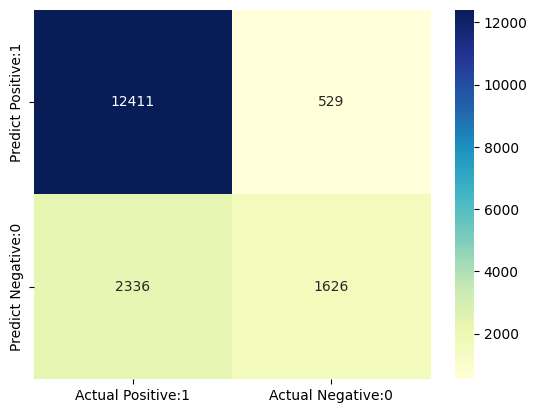

In [ ]:
# memvisualisasikan matriks kebingungan dengan peta panas seaborn

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 16. Classification Metrices <a class="anchor" id="16"></a>

### Classification Report <a class="anchor" id="16.1"></a>


**Classification Report** adalah cara lain untuk mengevaluasi performa model klasifikasi. Ini menampilkan skor **precision**, **recall**, **f1** dan **support** untuk model. Saya telah menjelaskan istilah-istilah ini nanti.

Kami dapat mencetak Classification Report sebagai berikut:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_encoded, y_pred_test_encoded))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     12940
           1       0.74      0.41      0.53      3962
           2       0.00      0.00      0.00       474

    accuracy                           0.81     17376
   macro avg       0.52      0.46      0.47     17376
weighted avg       0.78      0.81      0.78     17376



### Classification Accuracy <a class="anchor" id="16.2"></a>

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8305


### Classification Error <a class="anchor" id="16.3"></a>

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1695


### Precision <a class="anchor" id="16.4"></a>


**Precision** dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang diprediksi. Ini dapat diberikan sebagai rasio positif sejati (TP) dengan jumlah positif benar dan salah (TP + FP).


Jadi, **Precision** mengidentifikasi proporsi hasil positif yang diprediksi dengan benar. Ini lebih mementingkan kelas positif daripada kelas negatif.



Secara matematis, Precision dapat didefinisikan sebagai rasio `TP ke (TP + FP).`

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9591


### Recall <a class="anchor" id="16.5"></a>


Recall dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang sebenarnya.
Ini dapat diberikan sebagai rasio true positives (TP) dengan jumlah true positives dan false negatives (TP + FN). **Recall** juga disebut **Sensitivity**.


**Recall** mengidentifikasi proporsi positif aktual yang diprediksi dengan benar.


Secara matematis, recall dapat diberikan sebagai rasio `TP to (TP + FN).`

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8416


### True Positive Rate<a class="anchor" id="16.6"></a>


**True Positive Rate** identik dengan **Recall**.


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8416


### False Positive Rate <a class="anchor" id="16.7"></a>

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2455


### Specificity <a class="anchor" id="16.8"></a>

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7545


### skor-f1 <a class="anchor" id="16.9"></a>


**f1-score** adalah rata-rata harmonik berbobot dari presisi dan daya ingat. **skor f1** terbaik adalah 1,0 dan yang terburuk
akan menjadi 0,0. **f1-score** adalah rata-rata harmonik dari presisi dan daya ingat. Jadi, **f1-score** selalu lebih rendah daripada ukuran akurasi karena mereka menyematkan presisi dan daya ingat ke dalam perhitungannya. Rata-rata tertimbang `f1-score` harus digunakan untuk
membandingkan model pengklasifikasi, bukan akurasi global.

### Support <a class="anchor" id="16.10"></a>


**Support** adalah jumlah sebenarnya dari kemunculan kelas dalam kumpulan data kami.

## 17. Menyesuaikan tingkat ambang batas <a class="anchor" id="17"></a>

In [ ]:
# print 10 probabilitas prediksi pertama dari dua kelas- 0 dan 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.69912795, 0.30087205],
       [0.90847073, 0.09152927],
       [0.95663871, 0.04336129],
       [0.78993419, 0.21006581],
       [0.05895763, 0.94104237],
       [0.95205605, 0.04794395],
       [0.93272785, 0.06727215],
       [0.87533931, 0.12466069],
       [0.73969794, 0.26030206],
       [0.1152098 , 0.8847902 ]])

### Pengamatan


- Di setiap baris, jumlahnya berjumlah 1.


- Ada 2 kolom yang sesuai dengan 2 kelas - 0 dan 1.

     - Kelas 0 - probabilitas prediksi bahwa tidak ada hujan besok.
    
     - Kelas 1 - kemungkinan prediksi bahwa akan ada hujan besok.
        
    
- Pentingnya probabilitas diprediksi

     - Kita dapat mengurutkan pengamatan berdasarkan kemungkinan hujan atau tidak hujan.


- proses prediksi_proba

     - Memprediksi probabilitas
    
     - Pilih kelas dengan probabilitas tertinggi
    
    
- Tingkat ambang klasifikasi

     - Ada tingkat ambang klasifikasi 0,5.
    
     - Kelas 1 - probabilitas hujan diperkirakan jika probabilitas > 0,5.
    
     - Kelas 0 - probabilitas tidak ada hujan diprediksi jika probabilitas < 0,5.

In [ ]:
# menyimpan probabilitas dalam dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.699128,0.300872
1,0.908471,0.091529
2,0.956639,0.043361
3,0.789934,0.210066
4,0.058958,0.941042
5,0.952056,0.047944
6,0.932728,0.067272
7,0.875339,0.124661
8,0.739698,0.260302
9,0.115210,0.884790


In [ ]:
# cetak 10 probabilitas prediksi pertama untuk kelas 1 - Probabilitas hujan

logreg.predict_proba(X_test)[0:10, 1]

array([0.30087205, 0.09152927, 0.04336129, 0.21006581, 0.94104237,
       0.04794395, 0.06727215, 0.12466069, 0.26030206, 0.8847902 ])

In [ ]:
# menyimpan probabilitas yang diprediksi untuk kelas 1 - Probabilitas hujan

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

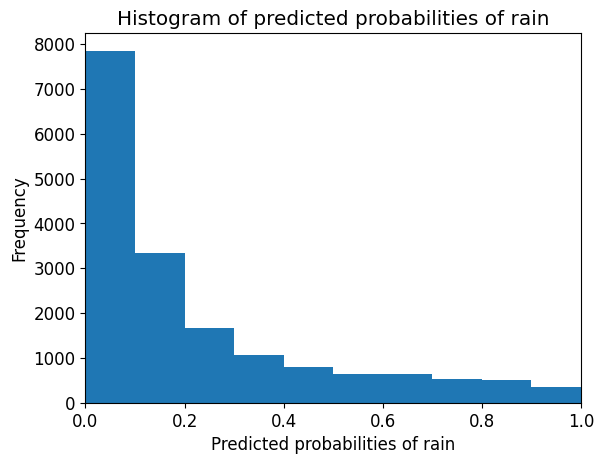

In [ ]:
# plot histogram dari probabilitas yang diprediksi


# menyesuaikan ukuran font
plt.rcParams['font.size'] = 12


# plot histogram dengan 10 tempat sampah
plt.hist(y_pred1, bins = 10)


# tetapkan judul probabilitas yang diprediksi
plt.title('Histogram of predicted probabilities of rain')


# tentukan batas sumbu x
plt.xlim(0,1)


# mengatur judul
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### Pengamatan


- Kita dapat melihat bahwa histogram di atas sangat miring positif.


- Kolom pertama memberi tahu kita bahwa ada sekitar 15.000 pengamatan dengan probabilitas antara 0,0 dan 0,1.


- Pengamatan berjumlah sedikit dengan probabilitas > 0,5.


- Jadi, jumlah pengamatan yang sedikit ini memperkirakan bahwa akan ada hujan besok.


- Sebagian besar pengamatan memperkirakan bahwa tidak akan ada hujan besok.

## 21. Optimasi Hyperparameter menggunakan GridSearch CV<a class="anchor" id="21"></a>

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# memeriksa model terbaik

# skor terbaik dicapai selama GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# cetak parameter yang memberikan hasil terbaik
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# cetak estimator yang dipilih oleh GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8434


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [ ]:
# menghitung skor CV GridSearch pada set tes

# Pasang encoder ke label di y_test
le.fit(y_test)

# Ubah label string menjadi label numerik di y_test dan y_pred_test
y_test_encoded = le.transform(y_test)
y_pred_test_encoded = le.transform(grid_search.predict(X_test))

# Menghitung skor akurasi
accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)

# Cetak skor CV GridSearch pada set tes
print('GridSearch CV score on test set: {0:0.4f}'.format(accuracy))

GridSearch CV score on test set: 0.8157


In [ ]:
! python -m pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 82.0 MB/s eta 0:00:00


In [ ]:
from sklearnex import patch_sklearn 
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Tentukan estimator dasar
base_estimator = LinearSVC(random_state=42)

# Tentukan parameter pencarian grid
param_grid = {
    'base_estimator__C': [0.1, 1, 10, 100]  # Perhatikan awalan 'base_estimator__' untuk menentukan parameter untuk estimator dasar
}

# Buat BaggingClassifier dengan 10 pengklasifikasi LinearSVC
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, max_samples=0.1, random_state=42)

# Lakukan grid search
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Periksa model terbaik

# Skor terbaik dicapai selama GridSearchCV
print('GridSearch CV best score: {:.4f}\n\n'.format(grid_search.best_score_))

# Cetak parameter yang memberikan hasil terbaik
print('Parameters that give the best results:\n\n', grid_search.best_params_)

#Estimator cetak yang dipilih oleh GridSearch
print('\n\nEstimator that was chosen by the search:\n\n', grid_search.best_estimator_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
GridSearch CV best score: 0.8423


Parameters that give the best results:

 {'base_estimator__C': 1}


Estimator that was chosen by the search:

 BaggingClassifier(base_estimator=LinearSVC(C=1, random_state=42),
                  max_samples=0.1, random_state=42)


In [ ]:
# calculate GridSearch CV score on test set

# Fit the encoder to the labels in y_test
le.fit(y_test)

# Transform the string labels to numerical labels in y_test and y_pred_test
y_test_encoded = le.transform(y_test)
y_pred_test_encoded = le.transform(grid_search.predict(X_test))

# Calculate the accuracy score
accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)

# Print the GridSearch CV score on the test set
print('GridSearch CV score on test set: {0:0.4f}'.format(accuracy))

GridSearch CV score on test set: 0.8141


### Komentar


- Akurasi uji model asli kami adalah 0,8501 sedangkan akurasi CV GridSearch adalah 0,8507.


- Kita dapat melihat bahwa GridSearch CV meningkatkan performa untuk model khusus ini.

## 22. Hasil dan Kesimpulan
 <a class="anchor" id="22"></a>

1. Nilai akurasi model logistic regression sebesar 0,8501. Jadi, model melakukan pekerjaan yang sangat baik dalam memprediksi apakah besok akan hujan atau tidak di Australia.

2. Pengamatan dalam jumlah kecil memperkirakan bahwa akan ada hujan besok. Sebagian besar pengamatan memperkirakan bahwa tidak akan ada hujan besok.

3. Model tidak menunjukkan tanda-tanda overfitting.

4. Peningkatan nilai C menghasilkan akurasi test set yang lebih tinggi dan juga akurasi training set yang sedikit meningkat. Jadi, kita dapat menyimpulkan bahwa model yang lebih kompleks akan bekerja lebih baik.

5. Peningkatan tingkat ambang menghasilkan peningkatan akurasi.

6. ROC AUC model kita mendekati 1. Jadi, kita dapat menyimpulkan bahwa pengklasifikasi kita melakukan pekerjaan yang baik dalam memprediksi apakah besok akan hujan atau tidak.

7. Skor akurasi model asli kami adalah 0,8501 sedangkan skor akurasi setelah RFECV adalah 0,8500. Jadi, kita dapat memperoleh akurasi yang hampir sama tetapi dengan set fitur yang dikurangi.

8. Dalam model aslinya, kita memiliki FP = 1175 sedangkan FP1 = 1174. Jadi, kita mendapatkan jumlah positif palsu yang kira-kira sama. Juga, FN = 3087 sedangkan FN1 = 3091. Jadi, kita mendapatkan negatif palsu yang sedikit lebih tinggi.

9. Skor model asli kami adalah 0,8476. Skor validasi silang rata-rata adalah 0,8474. Jadi, dapat disimpulkan bahwa validasi silang tidak menghasilkan peningkatan kinerja.

10. Akurasi uji model asli kami adalah 0,8501 sedangkan akurasi CV GridSearch adalah 0,8507. Kita dapat melihat bahwa GridSearch CV meningkatkan performa untuk model khusus ini.

*teks yang dimiringkan*[Go to the Top of the Page](#0)